In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import json

In [10]:
# coco = COCO('./yanglaoyuan_wo_ground_valid_coco.json')
# coco = COCO('./coco_old_man_val.json')
# coco=COCO('/home/scripts/data/valid_json/coco_jilinai-yanglaoyuan-20220707_val.json')
coco=COCO('/mnt/RDTeam/01_BDAI/yanglaoyuan_data/Train_val_split/coco_20220829_val.json')

loading annotations into memory...
Done (t=5.83s)
creating index...
index created!


In [12]:
# coco = COCO('./yanglaoyuan_valid_coco.json')

In [11]:
cats = coco.loadCats(coco.getCatIds())
#print(cats)#[{'supercategory': 'ground', 'id': 1, 'name': 'ground'}, {'supercategory': 'person', 'id': 2, 'name': 'person'}, {'supercategory': 'bed', 'id': 3, 'name': 'bed'}]
nms=[cat['name'] for cat in cats]
# print(nms)#['ground', 'person', 'bed']
print('COCO categories: \n{}\n'.format(' '.join(nms)))#ground person bed

nms = set([cat['supercategory'] for cat in cats])
# print(nms)#{'bed', 'ground', 'person'}
print('COCO supercategories: \n{}'.format(' '.join(nms)))#bed ground person

COCO categories: 
person bed person bed person bed person bed person bed

COCO supercategories: 
bed person


In [14]:
catIds = coco.getCatIds(catNms=['person','bed']);#catNms=['person','bed']--->[2, 3]
# print(catIds)#--->[2, 3]
imgIds = coco.getImgIds(catIds=catIds)
# print(imgIds)#--->[1, ....2548]
imgIds = coco.getImgIds(imgIds = [3000])
# print(imgIds)#-->[100]
# print(imgIds[np.random.randint(0,len(imgIds))])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# print(img)#-->{'file_name': 'D40_20211210055959_07340.jpg', 'height': 360, 'width': 640, 'id': 100, 'local_path': '/home/scripts/data/jpg/D40_20211210055959_07340.jpg'}

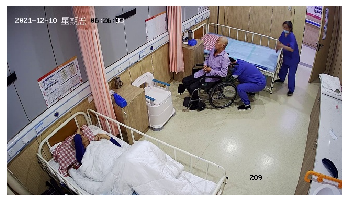

In [15]:
I = io.imread(img['local_path'])
plt.axis('off')
plt.imshow(I)
plt.show()

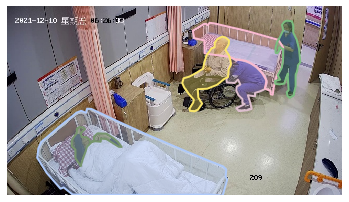

In [16]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
# print(annIds)#-->[7237, 7238, 7239, 7240, 7242, 7244, 7245]
anns = coco.loadAnns(annIds)
# print(anns)
coco.showAnns(anns)

In [9]:
for ann in anns:
    print(ann['category_id'])

2
1
2
